In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import csv
import matplotlib as mpl
from scipy.fftpack import fft,ifft,rfft
%matplotlib inline 
import sys
# from pylab import *  
# mpl.rcParams['font.sans-serif'] = ['SimHei'] 
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from scipy import  stats,signal
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
import seaborn as sns
sns.set_style('whitegrid')
from scipy import interpolate  

/home/aaron/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import random

In [4]:
for i in range(18):
 print random.uniform(0,1)

0.0525603425253
0.0235467449361
0.184822271162
0.0374056308196
0.490309158067
0.667015882934
0.0997383594212
0.146781793224
0.0674939021995
0.973642084655
0.475663720087
0.299932555315
0.717174980446
0.462134233442
0.506817539925
0.0245738263332
0.368268136391
0.977086005924


In [9]:
sns.set()

In [2]:
filedirrootname=r'/home/aaron/301f1data/'

# 基本的数据结果

In [3]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys
def ce(xs,ys,cevalue=0.95):
    temp=abs(ys-cevalue)
    temp_list=temp.tolist()
    return xs[temp_list.index(min(temp))]

3940次测试得到ce95=37.43,ce67=16.17,平均误差为14.53


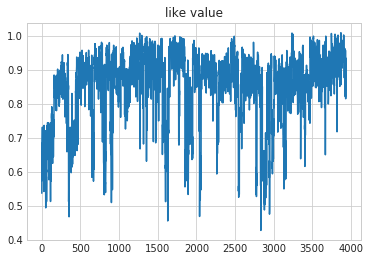

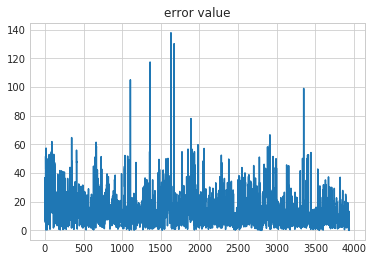

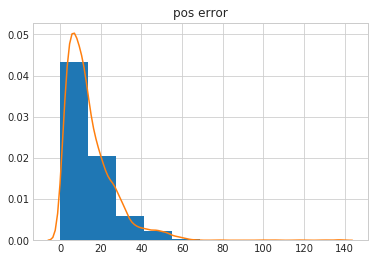

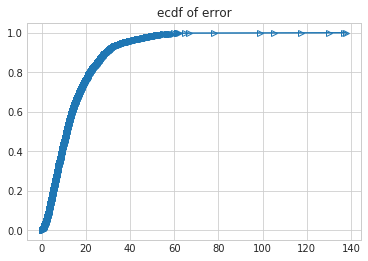

In [1129]:
nl=['lin','ya']

fpstr=nl[1]
datastr=nl[0]
filechoose=filedirrootname+'/'+fpstr
# filechoose=filedirrootname

fp=np.loadtxt(os.path.join(filechoose,'alldata.csv'),delimiter=',')
filechoose2=filedirrootname+'/'+datastr
# filechoose2=filedirrootname
# filechoose2=r'D:\txc\301wifi\wifi\oppo'
data=np.loadtxt(os.path.join(filechoose2,'alldata.csv'),delimiter=',')
data_cho=data
fp_cjo=fp
# Lx=np.sum(data_cho.dot(data_cho.T),axis=0)
# Ly=np.sum(fp_cjo.dot(fp_cjo.T),axis=0)
# Lx=Lx.reshape(Lx.shape[0],1)
# Ly=Ly.reshape(Ly.shape[0],1)
# m=Lx.dot(Ly.T)

like=np.dot(data_cho[:,2:],fp_cjo[:,2:].transpose())
#指纹自己和自己算可以先不用归一
# like=like/like.sum(axis=1).reshape(like.shape[0],1)

like_result=like
like_result=np.vstack((fp_cjo[:,0],like_result))
like_result=np.vstack((fp_cjo[:,1],like_result))
col_temp=np.zeros((2+data_cho.shape[0],2))
col_temp[2:,:]=data_cho[:,:2]
like_result=np.hstack((col_temp,like_result))
# np.savetxt(os.path.join(filechoose,'%sfp%sdatalike.csv'%(fpstr,datastr)),like_result,fmt='%.5f',delimiter=',') 

like=like.tolist()
rxy=[]
for index,item in enumerate(like):
    x,y=data_cho[index,:2]
    m_x,m_y=fp_cjo[item.index(max(item)),:2]
    rxy.append([max(item),x,y,m_x,m_y,np.sqrt((x-m_x)*(x-m_x)+(y-m_y)*(y-m_y))]) 
rxy_ar=np.array(rxy)
plt.plot(rxy_ar[:,0])
plt.title('like value')
plt.figure()
plt.plot(rxy_ar[:,-1])
plt.title('error value')
# sns.plt.grid()
plt.figure()
plt.hist(rxy_ar[:,-1],normed='True')
sns.kdeplot(rxy_ar[:,-1])
# plt.grid()
plt.title('pos error')
xs, ys = ecdf(rxy_ar[:,-1])
ce95=ce(xs,ys,0.95)
ce67=ce(xs,ys,0.67)
plt.figure()
plt.plot(xs, ys,  marker=">", markerfacecolor='none')
plt.title('ecdf of error')
# sns.plt.grid()
print ('%d次测试得到ce95=%.2f,ce67=%.2f,平均误差为%.2f'%(data_cho.shape[0],ce95,ce67,np.mean(rxy_ar[:,-1])))
# np.savetxt(os.path.join(filechoose,'%sfp%sdatasresult.csv'%(fpstr,datastr)),rxy_ar,fmt='%.5f',delimiter=',') 

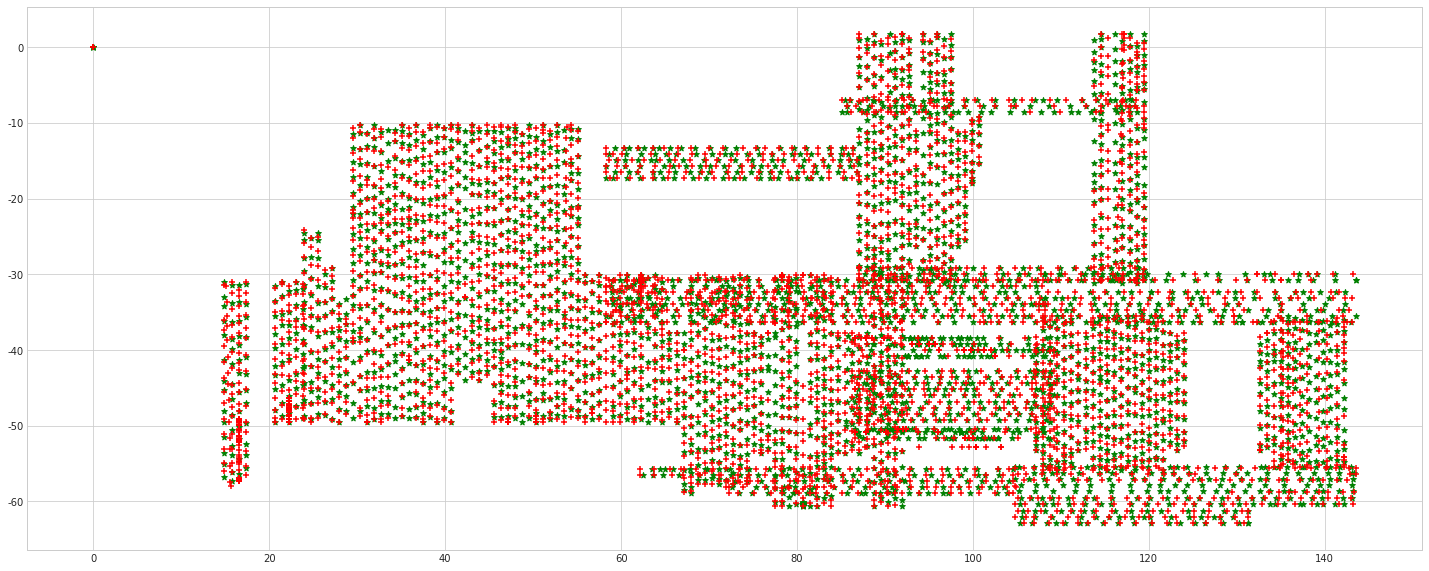

In [1130]:
plt.figure(figsize=(25,10))
plt.scatter(like_result[1,2:],like_result[0,2:],c='g',marker='*')
plt.scatter(like_result[2:,0],like_result[2:,1],c='r',marker='+')


# 将其在所在位置周围打wifi信号进行叠加

In [52]:
like_result.shape

(3507, 4319)

In [54]:
rxy_ar.shape

(3505, 6)

In [21]:
index=1

In [1160]:
# for index in range(like_result.shape[0]-2):
# index=1
def showindex(index):
#     index+=1
    plt.figure(figsize=(25,10))
    cm = plt.cm.get_cmap('RdYlBu_r') 
    plt.plot(like_result[index+2,0],like_result[index+2,1],marker='*',markersize=40)
#     plt.plot(like_result[2:,0],like_result[2:,1])
    sc=plt.scatter(like_result[1,2:],like_result[0,2:],c=like_result[index+2,2:],cmap=cm)
    sy = np.where(like_result[index+2,2:]==like_result[index+2,2:].max())
    sy=sy[0][0]
    print sy
    plt.plot(like_result[1,sy+2],like_result[0,sy+2],marker='o',markersize=20,c='r')
    print ('%dth,%.3f==%.3f'%(index,like_result[index+2,sy+2],rxy_ar[index,-1]))
    plt.colorbar(sc)
#     plt.figure()

#     plt.savefig(r'D:\txc\pic\%d.png'%index,dpi=500)
#     plt.close()
# like_result[1,:]

2592
15th,0.604==57.403


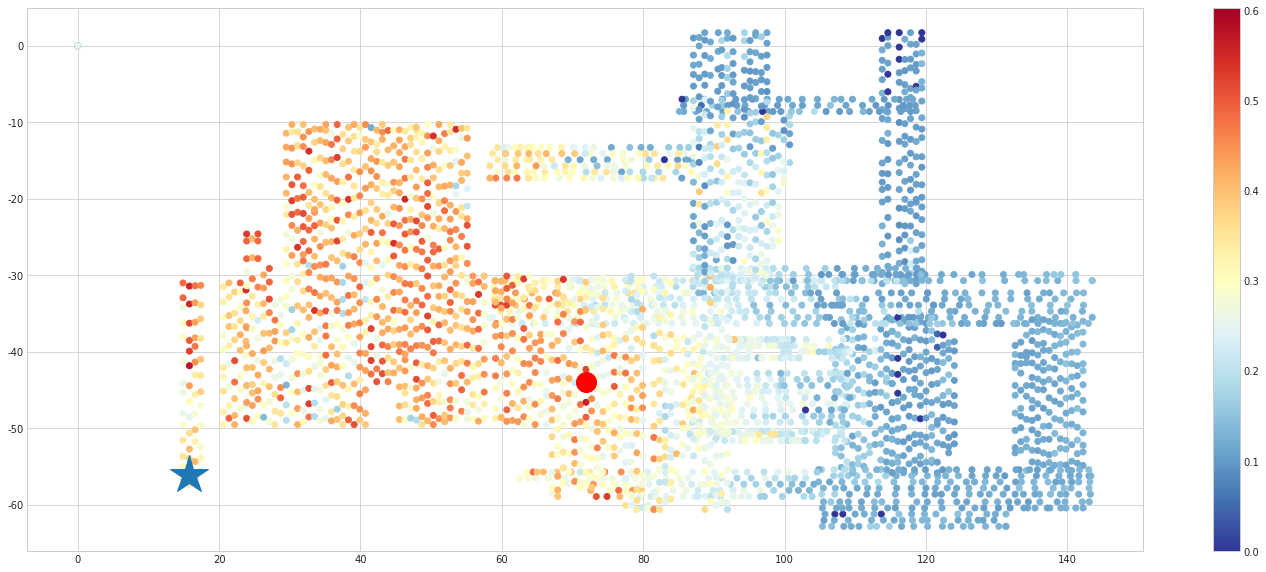

In [1162]:
# %matplotlib 
index=15
# index+=1
showindex(index)

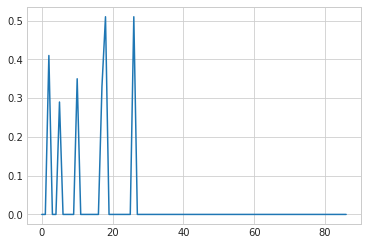

In [1159]:
plt.plot(data[15,2:])

In [1148]:
filechoose2=filedirrootname+'/'+nl[0]
data=np.loadtxt(os.path.join(filechoose2,'Oalldata.csv'),delimiter=',')
filechoose2=filedirrootname+'/'+nl[1]
data2=np.loadtxt(os.path.join(filechoose2,'Oalldata.csv'),delimiter=',')
nl

['lin', 'ya']

In [1149]:
#查看wifi的位置
bs=1

def showwifi(index,data):
    # index=30
    xl=150/bs
    yl=75/bs
    px=range(xl)
    py=range(yl)
    plain=np.zeros((len(py),len(px)))-50
    # plt.plot(data[:,index])
    tempList=np.where(data[:,index]>0)
    # print tempList
    # plt.scatter(data[temp,0],data[temp,1],c='r')
    xylist=[]
    for temp in tempList[0]:
        x,y= (int(data[temp,0]/bs),int(data[temp,1]/bs))
        xylist.append([x,y])
        plain[-y,x]=data[temp,index]
    plt.figure(figsize=(15,4))
#     for index in range(5):
#         for row in range(plain.shape[0]):
#             for col in range(plain.shape[1]):
#                 if [col,-row] not in xylist:
#                     try:
#                         plain[row,col]=plain[row-1:row+1,col-1:col+1].mean()
#                     except:
#                         pass
    plain=plain-110
    newfunc = interpolate.interp2d(px, py, plain, kind='cubic') 
    xnew = np.linspace(0,xl,xl*20)#x  
    ynew = np.linspace(0,yl,yl*20)#y  
    fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值  
#     plt.pcolor(fnew)
#     sns.heatmap(fnew)
    im2=plt.imshow(fnew, extent=[0,xl,0,yl],cmap=mpl.cm.hot, origin="lower")
    plt.grid()
    plt.colorbar(im2)  
# showwifi(3)

In [22]:
machash=pd.read_csv(os.path.join(filedirrootname,'unique.csv'))
machash.head()

,hash,name,mac,rssi
0,0,1,52:68:0a:20:7c:90,-57
1,1,��BA601,8e:79:67:9e:52:f2,-64
2,2,10D065��mix2,ee:d0:9f:48:2e:6d,-80
3,3,16��ѹ���WiFi,5e:69:6c:7e:b1:57,-88
4,4,301wifi,70:f9:6d:bb:35:b0,-80


hash                   21
name              301wifi
mac     5c:dd:70:f8:8b:40
rssi                  -88
Name: 21, dtype: object


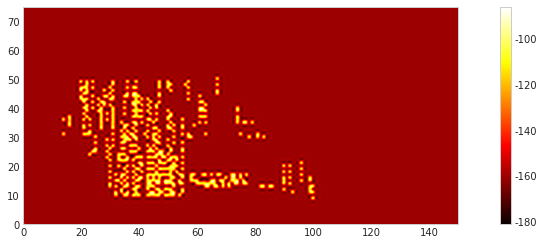

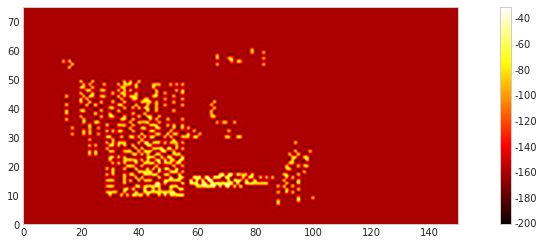

In [1157]:
# %%time
# index=0
index=20
index+=1
print machash.loc[index,:]
showwifi(index,data)
showwifi(index,data2)

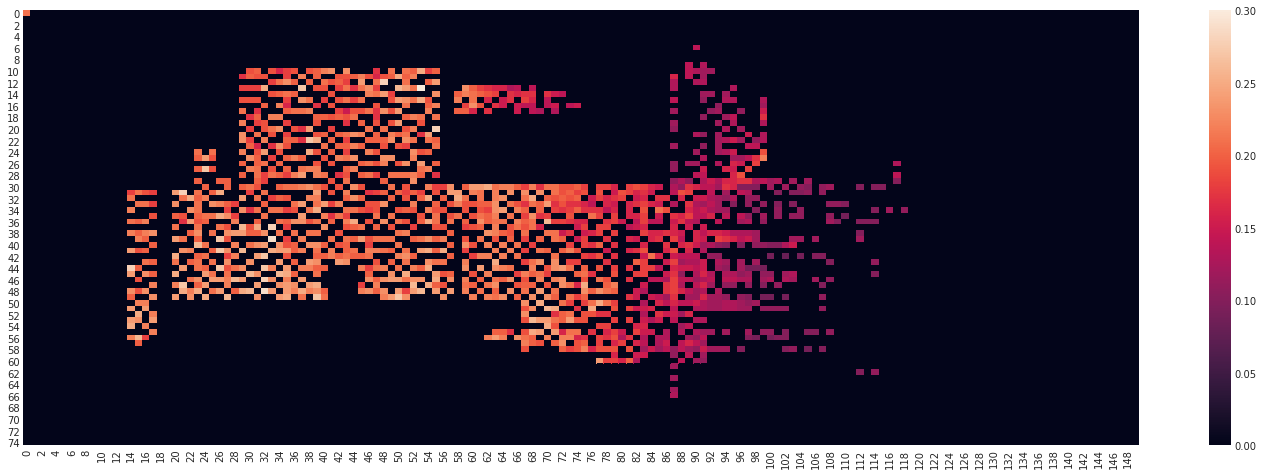

In [25]:
showwifi(9)

In [1151]:
plt.plot(data[:,110],'c*',label='9')
plt.plot(data[:,151],'go',label='10')


IndexError: index 153 is out of bounds for axis 1 with size 89

# 重新处理指纹，将该值附近的点全部加起来求平均，生成新的指纹

In [651]:
prodata=data
minx=data[:,0].min()
maxx=data[:,0].max()
miny=data[:,1].min()
maxy=data[:,1].max()
simZ=data.shape[1]-2
xlen=int(maxx-minx)+1
ylen=int(maxy-miny)+1
print ylen,minx,miny

72 0.0 -69.46


In [799]:

%%time
#建立所用的空间矩阵
plainWifi=np.zeros((xlen,ylen,simZ))
for row in prodata:
#     print (int(row[0]-minx),int(row[1]-miny))
    plainWifi[int(row[0]-minx),int(row[1]-miny),:]=row[2:]

for row in range(xlen):
    for col in range(ylen):
#         if row+col==0:
#             print plainWifi[row,col,:]
        try:   
            temp=np.sum(plainWifi[row-1:row+1,col-1:col+1,:].sum(axis=0),axis=0)

            tempmo=np.dot(temp,temp)
            if tempmo>0:
                plainWifi[row,col,:]=temp/np.sqrt(tempmo) 
            else:
                if np.dot(plainWifi[row,col,:],plainWifi[row,col,:])>0:
                    plainWifi[row,col,:]=plainWifi[row,col,:]/np.sqrt(np.dot(plainWifi[row,col,:],plainWifi[row,col,:]))
        except:
            if np.dot(plainWifi[row,col,:],plainWifi[row,col,:])>0:
                plainWifi[row,col,:]=plainWifi[row,col,:]/np.sqrt(np.dot(plainWifi[row,col,:],plainWifi[row,col,:]))

                

# where_are_nan = np.isnan(plainWifi)  
# plainWifi[where_are_nan] = 0 

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 104 ms


In [234]:
ces=np.random.rand(2,3,4)
np.sum(ces.sum(0),axis=0)

array([[[ 0.10046914,  0.36668647,  0.63910603,  0.75746945],
        [ 0.43060977,  0.69354853,  0.07231882,  0.93964378],
        [ 0.72053729,  0.39725159,  0.04080081,  0.64414456]],

       [[ 0.33282317,  0.89830344,  0.07345574,  0.85197259],
        [ 0.04866465,  0.11970174,  0.51227431,  0.3212463 ],
        [ 0.11287561,  0.05969275,  0.94548704,  0.83508667]]])

In [445]:
x=plainWifi[0,0,:]
# np.dot(x,x)
x

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [453]:
filechoose2=filedirrootname+'/'+nl[1]
mmdata=np.loadtxt(os.path.join(filechoose2,'Oalldata.csv'),delimiter=',')

In [1163]:
def mmfun(mmindex,mode=1,bs=1):
    mmrow=mmdata[mmindex,:]
    mmrow[2:]=mmrow[2:]/np.sqrt(np.dot(mmrow[2:],mmrow[2:]))
    x=mmrow[0]
    y=mmrow[1]
    like=[]
    templike=np.zeros((ylen+1,xlen+1))
#     bs=2

    for rowindex,row in enumerate(range(xlen)):
        templikecol=[]
        for colindex,col in enumerate(range(ylen)):
            if row%bs==0 and col%bs==0:
                likevalue=np.dot(mmrow[2:],plainWifi[row,col,:])
                like.append([row+minx,col+miny,likevalue])
                templike[ylen-colindex,rowindex]=likevalue

    likeAr=np.array(like)
    likemax=likeAr[:,2].max()
    sy = np.where(likeAr[:,2]==likemax)
    sy=sy[0][0]
    m_x=likeAr[sy,0]
    m_y=likeAr[sy,1]
    if mode==0:
        plt.figure(figsize=(16,9))
        plt.plot(int(x),(y),'g*',markersize=10)
        sc=plt.scatter(likeAr[:,0],likeAr[:,1],c=likeAr[:,2],marker='o',s=60) 
        plt.colorbar(sc)
        plt.plot(likeAr[sy,0],likeAr[sy,1],'g+',markersize=10) 

#         tl=np.array(templike)
#         plt.figure(figsize=(25,10))
#         sns.heatmap(tl)

    return [likemax,x,y,m_x,m_y,np.sqrt((x-m_x)*(x-m_x)+(y-m_y)*(y-m_y))]


1686


[0.78133868669534823,
 35.899999999999999,
 -14.9,
 36.0,
 -35.459999999999994,
 20.560243189223218]

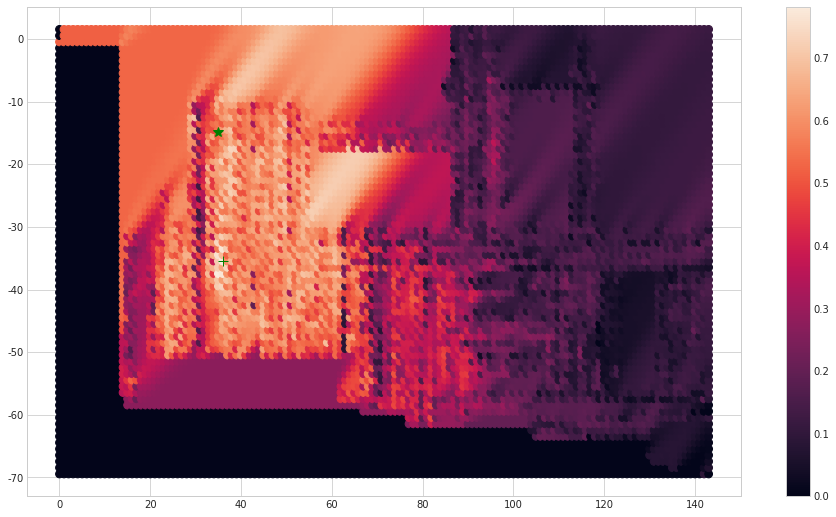

In [867]:
# ci=1500
ci+=2
print ci
mmfun(ci,mode=0,bs=1)

In [ ]:
%%time
result=[]
for mmindex in range(mmdata.shape[0]):
    result.append(mmfun(mmindex,bs=1))

rxy_ar=np.array(result)
plt.plot(rxy_ar[:,0])
plt.title('like value')
plt.figure()
plt.plot(rxy_ar[:,-1])
plt.title('error value')
# sns.plt.grid()
plt.figure()
plt.hist(rxy_ar[:,-1],normed='True')
sns.kdeplot(rxy_ar[:,-1])
# plt.grid()
plt.title('pos error')
xs, ys = ecdf(rxy_ar[:,-1])
ce95=ce(xs,ys,0.95)
ce50=ce(xs,ys,0.50)
plt.figure()
plt.plot(xs, ys,  marker=">", markerfacecolor='none')
plt.title('ecdf of error')
# sns.plt.grid()
print ('%d次测试得到ce95=%.2f,ce50=%.2f,平均误差为%.2f'%(mmdata.shape[0],ce95,ce50,np.mean(rxy_ar[:,-1])))
np.savetxt(os.path.join(filechoose2,'%sfp%swwww.csv'%(fpstr,datastr)),rxy_ar,fmt='%.5f',delimiter=',') 



In [649]:
xmin=rxy_ar[:,1].min()
xmax=rxy_ar[:,1].max()
ymin=rxy_ar[:,2].min()
ymax=rxy_ar[:,2].max()
xlen=int(xmax-xmin)
ylen=int(ymax-ymin)
tsl=np.zeros((ylen+1,xlen+1))
for item in result:
    tsl[int(item[2]),int(item[1] )]=item[-1]

plt.figure(figsize=(25,10))
sns.heatmap(tsl)


IndexError: index 100 is out of bounds for axis 0 with size 94

In [589]:
ymin,ymax

(-62.799999999999997, 30.84)

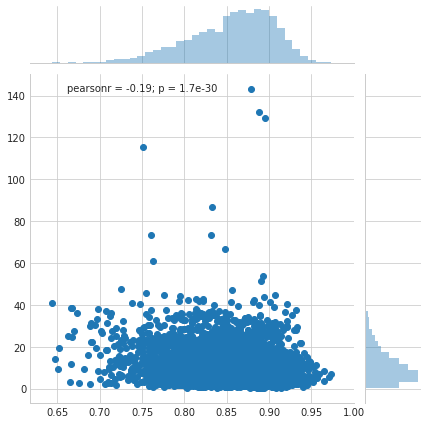

In [760]:
sns.jointplot(rxy_ar[:,0],rxy_ar[:,-1])

## 查看误差的分布区域

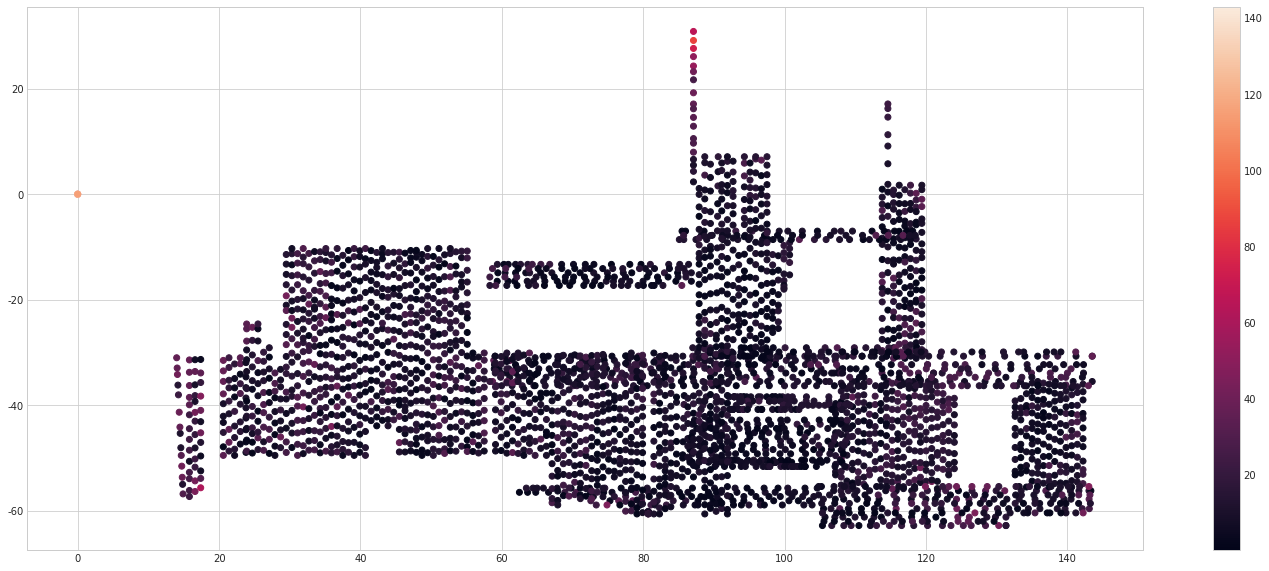

In [761]:
# plt.switch_backend(u'Qt4Agg')
%matplotlib inline
plt.figure(figsize=(25,10))
# cm = plt.cm.get_cmap('RdYlBu_r') 
sc=plt.scatter(rxy_ar[:,1],rxy_ar[:,2],c=rxy_ar[:,-1])
plt.colorbar(sc)

In [632]:
%matplotlib --list

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'agg', 'gtk', 'tk', 'ipympl', 'inline']


In [637]:
%matplotlib inline